# Multinominal Logistic Regression

In multinomial regression, we have $K$ classes and inputs with $n$ features, i.e., $\mathcal{X} = \mathbb{R}^n$ and $\mathcal{Y} = \{ 1, \ldots, K \}$.

The hypothesis, for class $k$, is the estimated probability $\phi_k$ that $\mathbf{x}$ was drawn from class $k$ using
the linear transformation of the input followed by the softmax function:

$$\phi_k = \frac{e^{\theta_k^T \mathbf{x}}}{\sum_{j=1}^K e^{\theta_j^T \mathbf{x}}}.$$

The cost function is the *cross entropy* loss function
$$J(\theta) = -\sum_{i=1}^m \log \phi_{y^{(i)}}.$$

The algorithm to minimize the cost $J(\theta)$ is just gradient descent. The batch version of the gradient is
$$ \frac{\partial J}{\partial \theta_{kl}} = - \sum_{i=1}^m (\delta(y^{(i)} = k) - \phi_k)x_l^{(i)}.$$

To demonstrate, we synthesize data consisting of 4 different classes in 2D, as 4 overlapping 2D Gaussians, then apply Multinominal Logistic Regression. Then visualize the results.

Now, we can try with 2 scenarios.

## 1. Scenario 1:

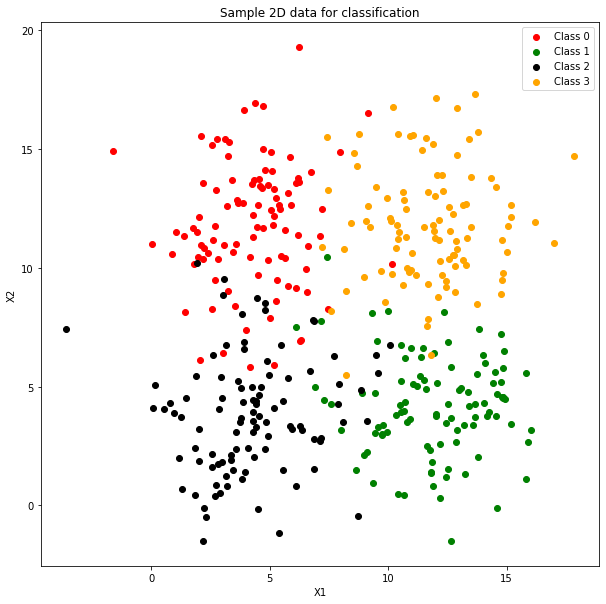

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mu1 = np.array([4, 12])
mu2 = np.array([12, 4])
mu3 = np.array([4, 4])
mu4 = np.array([12, 12])

sigma = np.array([[5, 0],[0, 5]])

X1 = np.random.multivariate_normal(mu1, sigma, 100)
X2 = np.random.multivariate_normal(mu2, sigma, 100)
X3 = np.random.multivariate_normal(mu3, sigma, 100)
X4 = np.random.multivariate_normal(mu4, sigma, 100)

X = np.concatenate((np.ones((400, 1)), np.concatenate((X1, X2, X3, X4), 0)), 1)
y = np.concatenate((np.zeros((100, 1)), np.ones((100, 1)), np.ones((100, 1))*2, np.ones((100, 1))*3), 0)

plt.figure(figsize = (10,10))
plt.scatter(X1[:,0], X1[:,1], marker='o',color='red', label='Class 0')
plt.scatter(X2[:,0], X2[:,1], marker='o',color='green', label='Class 1')
plt.scatter(X3[:,0], X3[:,1], marker='o',color='black', label='Class 2')
plt.scatter(X4[:,0], X4[:,1], marker='o',color='orange', label='Class 3')
plt.title('Sample 2D data for classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

Here is the hypothesis function outputting all $\phi_k$ predictions for all $m$ values in matrix $X$, a cost
function with gradient calculation, and a gradient descent loop:

In [2]:
K=len(np.unique(y))

theta = np.zeros((K, X.shape[1]))

def hypothesis(X, theta):
    K = theta.shape[0]
    m = X.shape[0]
    a = np.zeros((m, K))
    for k in range(K):
        a[:,k:k+1] = X @ theta[k:k+1,:].T
    e_a = np.exp(a)
    return e_a / e_a.sum(axis=1, keepdims=True)

def onehot(y, K):
    Y = np.zeros((y.shape[0], K))
    for k in range(K):
        Y[y.reshape(-1)==k,k] = 1
    return Y
    
def cost(X, y, theta):
    K = theta.shape[0]
    m = X.shape[0]
    yhat = hypothesis(X, theta)
    # Form the matrix delta(y=k)
    Y = onehot(y, K)
    J = 0
    for k in range(K):
        J = J - np.log(yhat[y.reshape(-1)==k,k]).sum()
    J = J / m
    # Get the gradient matrix for theta
    grad_J = (yhat - Y).T @ X
    return J, grad_J

alpha = 0.0001
for epoch in range(150000):
    J, grad_J = cost(X, y, theta)
    if epoch % 5000 == 0:
        print('Epoch %d: cost %f' % (epoch, J))
    theta = theta - alpha * grad_J


Epoch 0: cost 1.386294
Epoch 5000: cost 0.301824
Epoch 10000: cost 0.277461
Epoch 15000: cost 0.267902
Epoch 20000: cost 0.263065
Epoch 25000: cost 0.260307
Epoch 30000: cost 0.258617
Epoch 35000: cost 0.257532
Epoch 40000: cost 0.256810
Epoch 45000: cost 0.256318
Epoch 50000: cost 0.255975
Epoch 55000: cost 0.255733
Epoch 60000: cost 0.255560
Epoch 65000: cost 0.255434
Epoch 70000: cost 0.255343
Epoch 75000: cost 0.255276
Epoch 80000: cost 0.255227
Epoch 85000: cost 0.255190
Epoch 90000: cost 0.255163
Epoch 95000: cost 0.255142
Epoch 100000: cost 0.255127
Epoch 105000: cost 0.255116
Epoch 110000: cost 0.255107
Epoch 115000: cost 0.255100
Epoch 120000: cost 0.255095
Epoch 125000: cost 0.255092
Epoch 130000: cost 0.255089
Epoch 135000: cost 0.255087
Epoch 140000: cost 0.255085
Epoch 145000: cost 0.255084


Next we calculate the (training set) accuracy:

In [3]:
m=X.shape[0]
preds = hypothesis(X, theta)
pred_classes = np.argmax(preds, axis=1)
print('Training set accuracy: %f' % ((pred_classes==y.reshape(-1)).sum()/m))

Training set accuracy: 0.900000


### Visualize Results

(250000,)


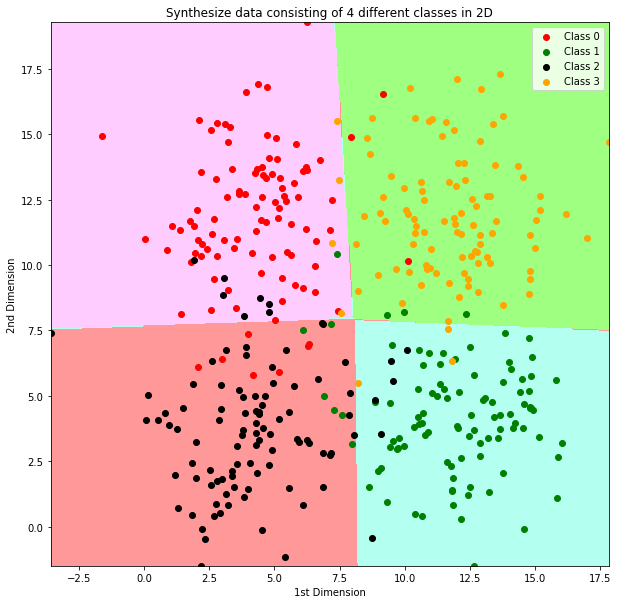

In [5]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(10, 10))

custom_cmap =ListedColormap(['#ffccff','#b3fff0','#ff9999','#9fff80'])

x0, x1 = np.meshgrid(
    np.linspace(X[:, 1].min(), X[:, 1].max(), 500).reshape(-1, 1),
    np.linspace(X[:, 2].min(), X[:, 2].max(), 500).reshape(-1, 1)
)

#X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = np.c_[np.ones((x0.shape[0]**2, 1)).ravel(),x0.ravel(), x1.ravel()]

preds = hypothesis(X_new,theta)
y_pred = np.argmax(preds, axis=1)
print(y_pred.shape)
zz = y_pred.reshape(x0.shape)


plt.contourf(x0, x1, zz, cmap=custom_cmap)
#plt.scatter(X[:, 1], X[:, 2], c=y)
plt.scatter(X1[:,0], X1[:,1], marker='o',color='red', label='Class 0')
plt.scatter(X2[:,0], X2[:,1], marker='o',color='green', label='Class 1')
plt.scatter(X3[:,0], X3[:,1], marker='o',color='black', label='Class 2')
plt.scatter(X4[:,0], X4[:,1], marker='o',color='orange', label='Class 3')


plt.title('Synthesize data consisting of 4 different classes in 2D')
plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')

plt.legend()
plt.show()

## 2. Scenario 2:

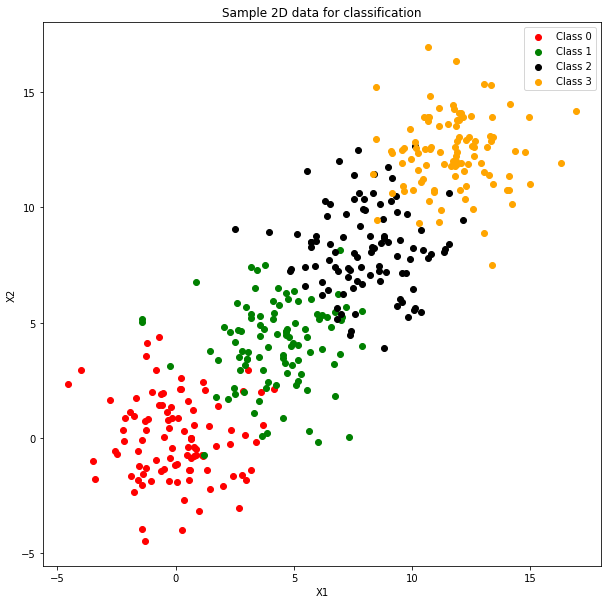

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


mu1 = np.array([0,0])
mu2 = np.array([4,4])
mu3 = np.array([8,8])
mu4 = np.array([12,12])

sigma = np.array([[3, 0],[0, 3]])

X1 = np.random.multivariate_normal(mu1, sigma, 100)
X2 = np.random.multivariate_normal(mu2, sigma, 100)
X3 = np.random.multivariate_normal(mu3, sigma, 100)
X4 = np.random.multivariate_normal(mu4, sigma, 100)

X = np.concatenate((np.ones((400, 1)), np.concatenate((X1, X2, X3, X4), 0)), 1)
y = np.concatenate((np.zeros((100, 1)), np.ones((100, 1)), np.ones((100, 1))*2, np.ones((100, 1))*3), 0)

plt.figure(figsize = (10,10))
plt.scatter(X1[:,0], X1[:,1], marker='o',color='red', label='Class 0')
plt.scatter(X2[:,0], X2[:,1], marker='o',color='green', label='Class 1')
plt.scatter(X3[:,0], X3[:,1], marker='o',color='black', label='Class 2')
plt.scatter(X4[:,0], X4[:,1], marker='o',color='orange', label='Class 3')
plt.title('Sample 2D data for classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [ ]:
alpha = 0.0001
for epoch in range(150000):
    J, grad_J = cost(X, y, theta)
    if epoch % 5000 == 0:
        print('Epoch %d: cost %f' % (epoch, J))
    theta = theta - alpha * grad_J
m=X.shape[0]
preds = hypothesis(X, theta)
pred_classes = np.argmax(preds, axis=1)
print('Training set accuracy: %f' % ((pred_classes==y.reshape(-1)).sum()/m))

Epoch 0: cost 4.992708
Epoch 5000: cost 0.286268
Epoch 10000: cost 0.263049
Epoch 15000: cost 0.251665
Epoch 20000: cost 0.243928
Epoch 25000: cost 0.238144
Epoch 30000: cost 0.233619
Epoch 35000: cost 0.229975
Epoch 40000: cost 0.226977
Epoch 45000: cost 0.224469
Epoch 50000: cost 0.222342
Epoch 55000: cost 0.220516
Epoch 60000: cost 0.218935
Epoch 65000: cost 0.217553
Epoch 70000: cost 0.216336
Epoch 75000: cost 0.215258
Epoch 80000: cost 0.214298
Epoch 85000: cost 0.213438
Epoch 90000: cost 0.212664
Epoch 95000: cost 0.211965
Epoch 100000: cost 0.211331
Epoch 105000: cost 0.210754
Epoch 110000: cost 0.210227
Epoch 115000: cost 0.209745
Epoch 120000: cost 0.209303
Epoch 125000: cost 0.208896
Epoch 130000: cost 0.208520
Epoch 135000: cost 0.208173
Epoch 140000: cost 0.207852
Epoch 145000: cost 0.207554
Training set accuracy: 0.922500


### Visualize Results

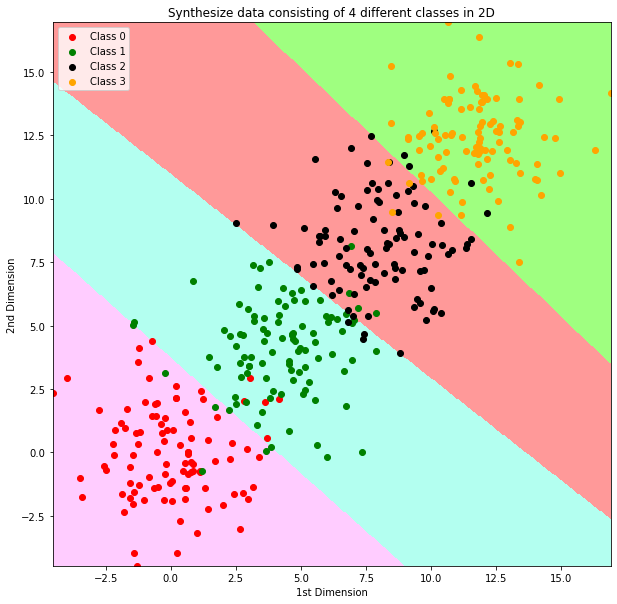

In [ ]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(10, 10))

custom_cmap =ListedColormap(['#ffccff','#b3fff0','#ff9999','#9fff80'])

x0, x1 = np.meshgrid(
    np.linspace(X[:, 1].min(), X[:, 1].max(), 500).reshape(-1, 1),
    np.linspace(X[:, 2].min(), X[:, 2].max(), 500).reshape(-1, 1)
)

#X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = np.c_[np.ones((x0.shape[0]**2, 1)).ravel(),x0.ravel(), x1.ravel()]

preds = hypothesis(X_new,theta)
y_pred = np.argmax(preds, axis=1)
zz = y_pred.reshape(x0.shape)


plt.contourf(x0, x1, zz, cmap=custom_cmap)
#plt.scatter(X[:, 1], X[:, 2], c=y)
plt.scatter(X1[:,0], X1[:,1], marker='o',color='red', label='Class 0')
plt.scatter(X2[:,0], X2[:,1], marker='o',color='green', label='Class 1')
plt.scatter(X3[:,0], X3[:,1], marker='o',color='black', label='Class 2')
plt.scatter(X4[:,0], X4[:,1], marker='o',color='orange', label='Class 3')


plt.title('Synthesize data consisting of 4 different classes in 2D')
plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')

plt.legend()
plt.show()